# Fundamentos de Redes Neuronales con Python y Keras

## Fundamentos en la Arquitectura de las Redes Neuronales

### Redes Neuronales

Las redes neuronales artificiales son inspiraciones de nuestras redes neuronales biológicas, ubicadas en nuestro cerebro.

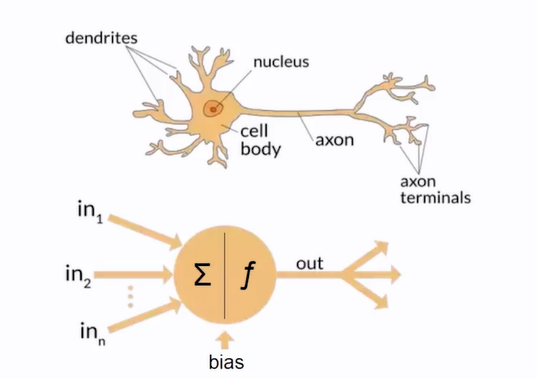

En las redes biológicas tenemos impulsos electromagnéticos que es información la cual llega como entrada a las dendritas, son transformados y procesados por reacciones químicas y son enviados a la siguiente neurona; las redes neuronales artificiales funcionan siguiendo este principio.

Un perceptrón toma información, la procesa y la entrega a las siguientes neuronas para que dicha información sea más limpia y profunda.

El concepto de las redes neuronales no es algo nuevo sino que viene desde la década de los 50s.

### Herramientas a utilizar

Las herramientas más conocidas para manejar redes neuronales son TensorFlow y PyTorch, los cuales son backend.

Keras es una API que se utiliza para facilitar el consumo del backend.

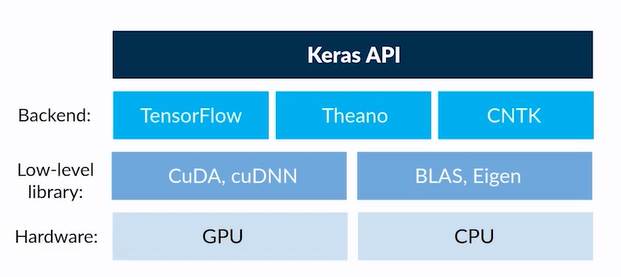

### Deep Learning

La **Inteligencia Artificial** son los intentos de replicar la inteligencia humana en sistemas artificiales.

Dentro de la IA tenemos **Machine Learning**, que son las técnicas de aprendizaje automático en las cuales el propio sistema aprende cómo encontrar una respuesta sin que alguien lo programe.

Dentro del ML tenemos el **Deep Learning** y es todo aquello orientado a las redes neuronales. Su nombre viene de que a medida que tenemos más capas conectadas entre sí obtenemos un aprendizaje más fino y limpio.

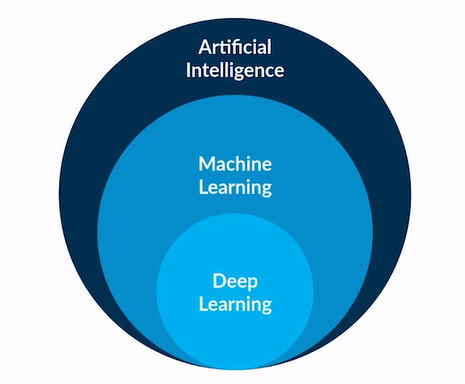

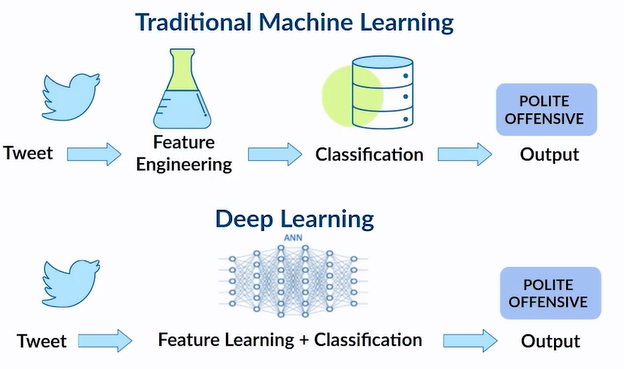

En DL existen dos grandes problemas:
- **Overfitting**: es cuando el modelo "aprende de memoria" los datos y no a generalizar.
- **Cajas Negras**: conocemos las entradas de las redes neuronales; sin embargo, no conocemos lo que pasa dentro de las capas intermedias de la red.

Esto trae un dilema: ¿es ético y responsable utilizar las redes neuronales sin saber lo que ocurre dentro de ellas?

### Primera red neuronal con Keras

Instalar las bibliotecas

In [15]:
# %pip install numpy pandas matplotlib seaborn tensorflow keras

Importar las bibliotecas

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from keras import layers, models
from keras.utils.np_utils import to_categorical
from keras.datasets import mnist

Cargamos los datos y los separamos en training y testing. Utilizaremos el dataset **mnist** el cual contiene 60000 28x28 imágenes en escala de grises de los dígitos del 0 al 9 y 10000 imágenes de testing. Nos devuelve dos tuplas: (xTrain, yTrain) y (xTest, yTest)

In [17]:
# Cargamos los datos ya separados en training y testing
(trainData, traingLabels), (testData, testLabels) = mnist.load_data()

In [18]:
trainData.shape

(60000, 28, 28)

Vemos que tenemos 60000 imágenes de 28x28 pixeles.

In [19]:
trainData[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

Seleccionando el primer elemento vemos que tenemos una matriz con números del 0 al 255; esto es así debido a que las imágenes del dataset están codificadas a 8 bits lo que significa que la cantidad de niveles de gris posibles son $2^8 = 256$ y por lo tanto 0 representa completamente negro y 255 completamente blanco.

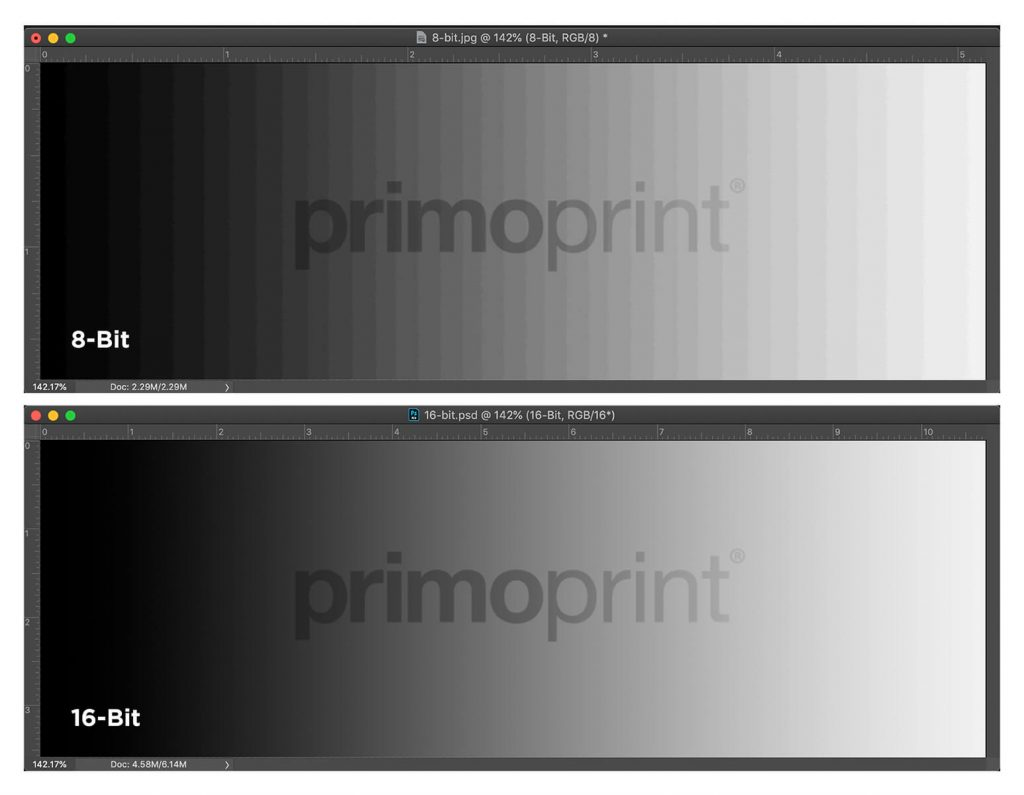

Podemos ver qué representa el primer dato.

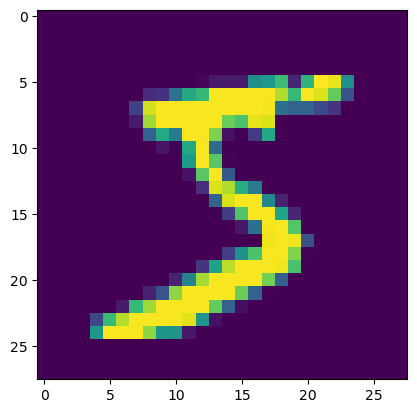

In [20]:
plt.imshow(trainData[0])
plt.show()

In [21]:
traingLabels[0]

5

En este caso, vemos que efectivamente representa un 5.

Ahora vamos a crear el modelo

In [23]:
# Creamos el modelo
model = models.Sequential()
# A nuestro modelo secuencial le agregamos capas de tipo Dense con 512 neuronas; activación de tipo relu; inputs de 28x28
model.add(layers.Dense(512, activation = "relu", input_shape = (28 * 28,)))
# Agregamos otra capa de 10 neuronas por las 10 posibles salidas; activación de tipo softmax
model.add(layers.Dense(10, activation = "softmax"))

# Ahora compilamos la red neuronal con un optimizador rmsprop y una función de pérdida categorical crossentropy y métrica de
# éxito de exactitud
model.compile(optimizer = "rmsprop", loss = "categorical_crossentropy", metrics = "accuracy")

Ahora podemos ver un resumen del modelo

In [25]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 512)               401920    
                                                                 
 dense_6 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


Vemos que tenemos una red neuronal de tipo secuencial con dos capas de datos; la primera recibe 512 neuronas y maneja 401920 parámetros y la segunda tiene 10 neuronas y maneja 5130 parámetros.

Ahora haremos una limpieza a los datos del dataset antes de entrenar al modelo para obtener un mejor procesamiento.

In [27]:
# Cambiamos la forma del conjunto de entrenamiento de 3 dimensiones a 2
xTrain = trainData.reshape((60000, 28*28))
# Cambiamos los datos a float por facilidad para la red neuronal y dividimos entre 255 para normalizar (0, 1)
xTrain = xTrain.astype("float32") / 255

# Hacemos lo mismo para el conjunto de prueba
xTest = testData.reshape((10000, 28*28))
xTest = xTest.astype("float32") / 255

# Hacemos One Hot Encoding a las variables de salida
yTrain = to_categorical(traingLabels)
yTest = to_categorical(testLabels)

Vemos que se realizó correctamente el One Hot Encoding.

In [29]:
yTrain[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

Ahora sí procedemos a entrenar la red neuronal.

In [31]:
# Entrenamos la red neuronal con los conjuntos de training; iteramos 5 veces; lotes de 128 unidades
model.fit(xTrain, yTrain, epochs = 5, batch_size = 128)

Epoch 1/5
469/469 [==============================] - 3s 7ms/step - loss: 0.0286 - accuracy: 0.9915
Epoch 2/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0221 - accuracy: 0.9937
Epoch 3/5
469/469 [==============================] - 3s 7ms/step - loss: 0.0162 - accuracy: 0.9955
Epoch 4/5
469/469 [==============================] - 3s 7ms/step - loss: 0.0120 - accuracy: 0.9970
Epoch 5/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0090 - accuracy: 0.9979


Realmente esto fue una caja negra ya que no sabemos qué sucedió por dentro; lo que sí sabemos es que en cada iteración la precisión del modelo aumentó y la pérdida disminuyó.

Evaluemos la red neuronal.

In [32]:
model.evaluate(xTest, yTest)

313/313 [==============================] - 1s 3ms/step - loss: 0.0673 - accuracy: 0.9814


[0.06732971966266632, 0.9814000129699707]

Acabamos de crear una red neuronal con precisión del 98.14% para el análisis de números.

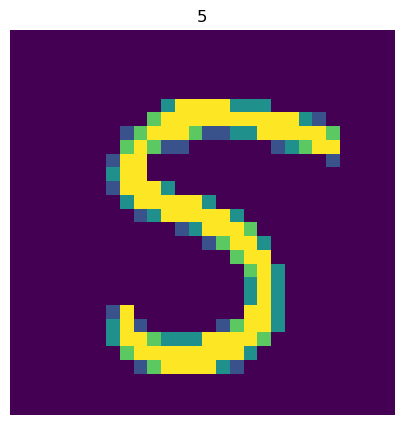

1/1 [==============================] - 0s 28ms/step
El número es... 5


In [53]:
import random as rd
# Selecciona un numero al azar dentro del conjunto de testing
index = rd.randint(0, 1000)
# Visualizar la imagen
plt.figure(figsize = (5, 5))
plt.imshow(xTest[index].reshape(28, 28))
# Ver en el título el número escogido
plt.title(np.argmax(yTest[index], axis = -1)) 
# Quitar los ejes
plt.axis(False)
plt.show()

# Hacemos una predicción utilizando el modelo
prediction = model.predict(xTest[index].reshape(1, 28*28))
print(f"El número es... {int(np.argmax(prediction, axis =-1))}")

### La neurona

La neurona que utlizamos es llamada **perceptrón** y fue inspirada por las redes neuronales biológicas.

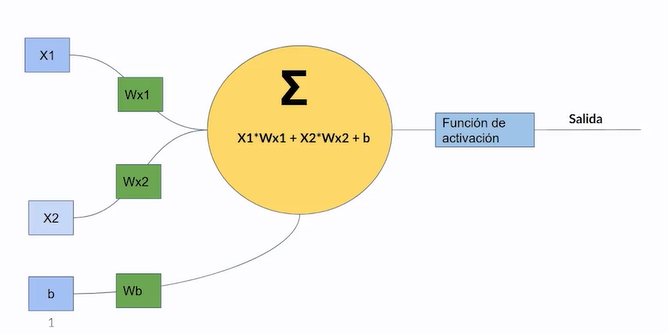

Tenemos entradas las cuales llamaremos $X_i$, unos pesos $W_{X_i}$ y un sesgo (**bias**) $b$ con su correspondiente peso $W_b$; por dentro se realizan unas sumas ponderadas de la forma $$X_1 * W_{X_1} + X_2 * W_{X_2} + ... + b$$ la cual es muy parecida a la fórmula de la regresión lineal y es que la salida de dicha suma ponderada es una operación lineal. La suma ponderada pasa por una función de activación y por último nos regresa un resultado.

El objetivo es cambiar los pesos en cada iteración para resolver un problema.

El sesgo nos permite desplazar el modelo en alguna dirección; esto es útil cuando la suma ponderada dé 0 ya que podemos mover el valor de la función a donde queramos.

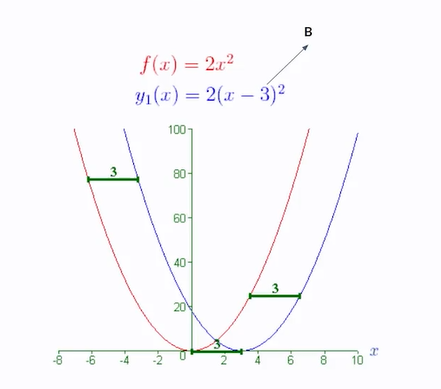

Alterando los pesos podemos obtener diferentes resultados, por ejemplo, comportamientos como compuertas AND o OR.
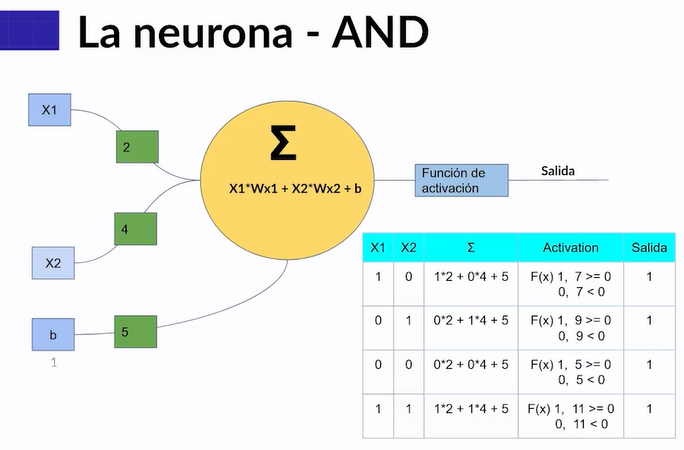
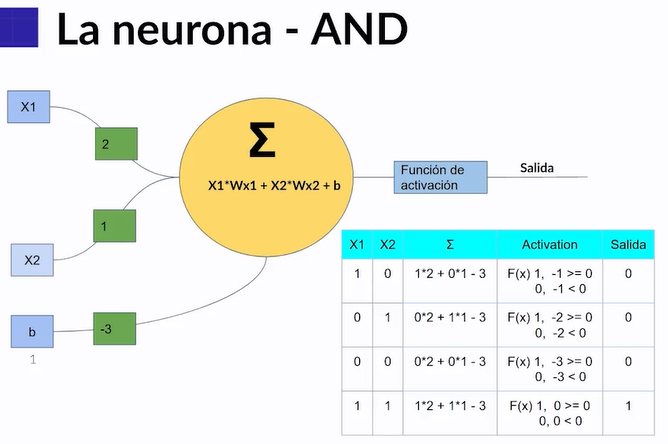
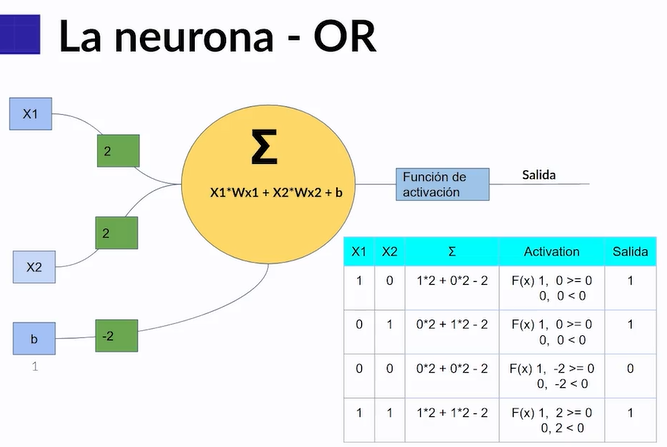

Esto que estamos haciendo no es más que una operación lineal por lo que llevado a un plano cartesiano sería como lo siguiente.

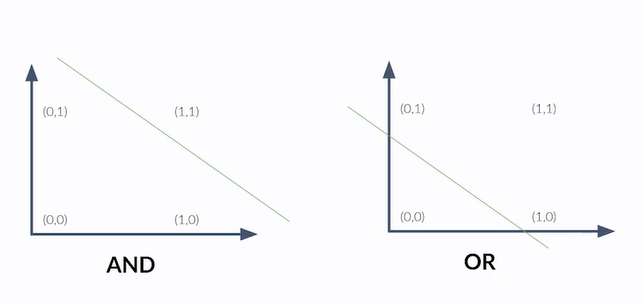

Si quisiéramos resolver el siguiente problema por media de una recta es imposible por lo que necesitamos utilizar dos líneas.

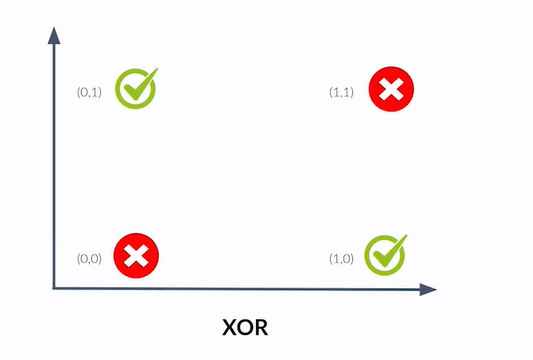
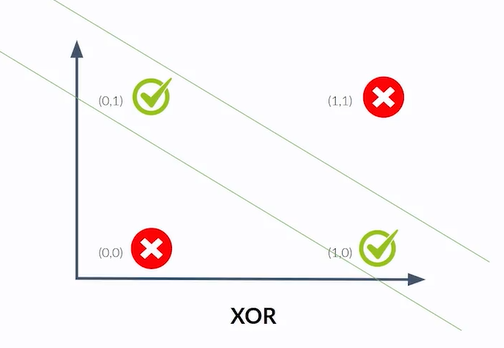

Esto de utilizar dos líneas se refiere a utilizar dos perceptrones.

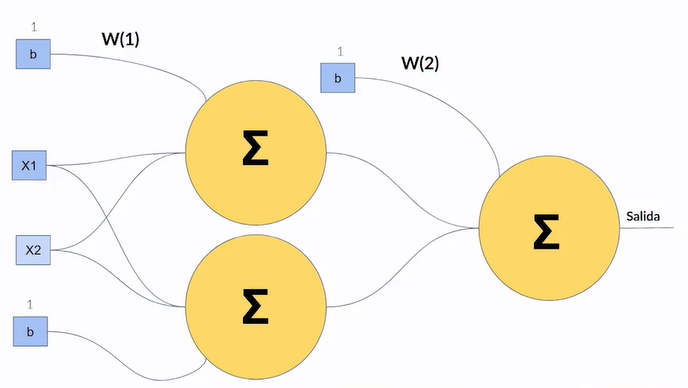

Significa que problemas más complejos los puedo solucionar agregando más perceptrones tanto en la misma capa como en otras para hacer información más robusta; esto no es más que una red neuronal.

### Arquitectura de una red neuronal

Las redes neuronales son manejadas por capas; cada capa pasa información a la siguiente haciéndola más compleja y simple de asimilar para la siguiente. Entre más capas la información será más precisa y filtrada.

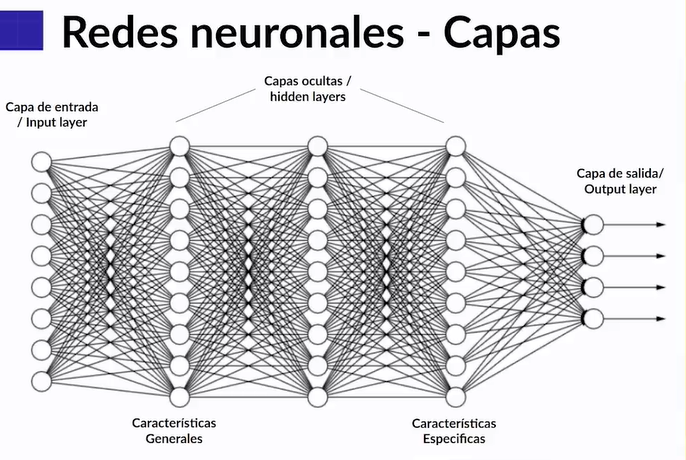

La capa inicial la llamamos **capa de entrada o input layer**; todas las capas que estén entre la inicial y la final serán **capas ocultas o hidden layers**; la última capa es la **capa de salida o output layer**. La capa de entrada recibe la información, las capas ocultas procesan la información y la capa final será la encargada de darnos el resultado. Las primeras capas ocultas tendrán información más genérica mientras que las últimas tendrán información más detallada la cual tiende al overfitting.


Cada entrada se relaciona con cada neurona y será evaluada matemáticamente por ciertos pesos; esto no es más que la multiplicación de matrices entre una matriz hecha de neuronas y un vector con las entradas; a la final le sumamos el sesgo y obtenemos la predicción.

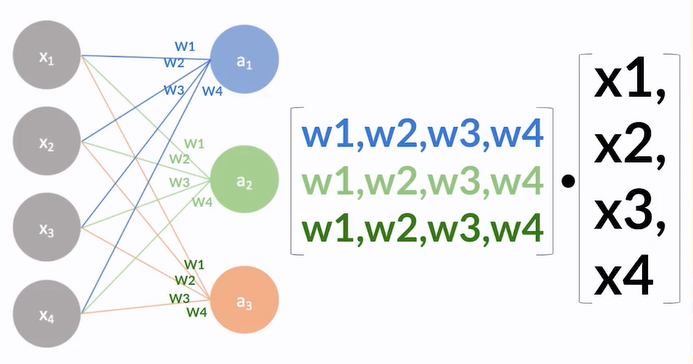
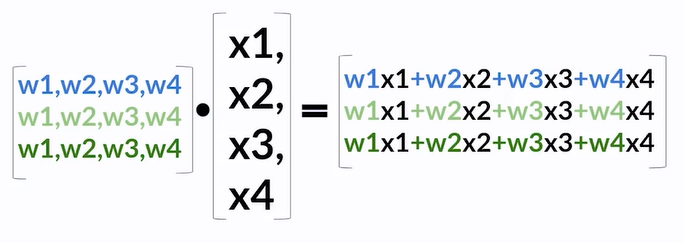
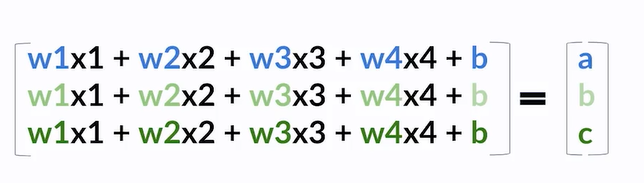

Si en lugar de un vector tenemos una matriz de entrada el proceso es el mismo, solo se deben respetar las condiciones para el producto punto.

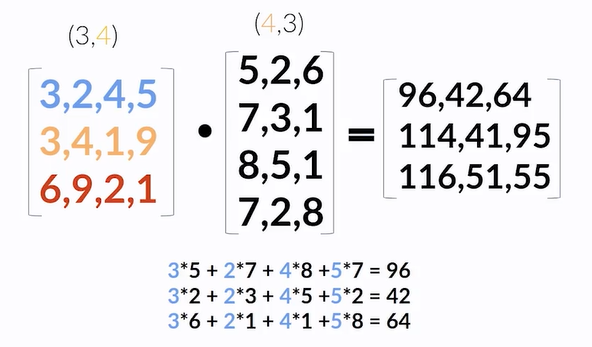

Estas operaciones se producen muchas veces cambiando los pesos; estas operaciones son lineales y las vamos apilando por lo que el resultado final será también lineal lo que hace que se pierda el aprendizaje complejo y profundo obtenido en las capas ocultas por lo que recurrimos a **funciones de activación** para solucionar esto.

### Funciones de activación

Existen funciones de activación discretas y continuas

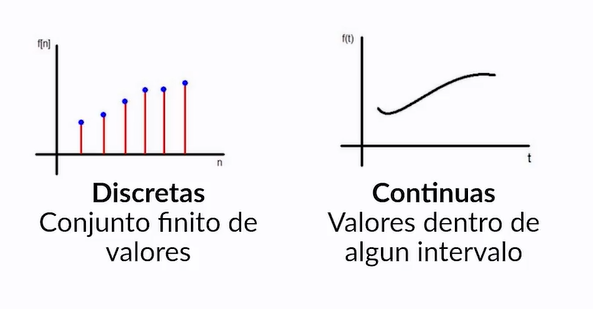

- **Función Escalonada/Threshold**: si el número que entra a la función es menor que 0 entonces devuelve 0, de lo contrario devuelve 1. Es útil para los casos en los que solo tengo dos posibles valores de salida (como compuertas lógicas). <br> 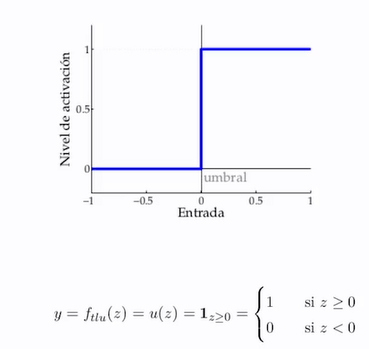
- **Función Signo/Signum**: es como la función escalonada pero en este caso va desde -1 hasta 1 para darle apertura a datos negativos. <br> 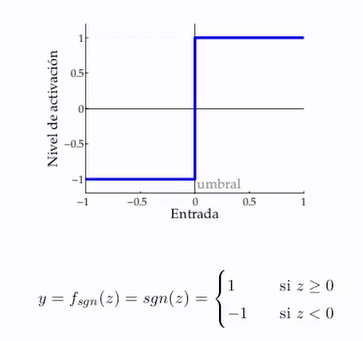
- **Función Sigmoidal/Sigmoid**: es una función continua que va desde 0 a 1 por lo que es muy buena para utilizarla con probabilidades; tiene la desventaja que si tenemos valores muy pequeños estos se apilarán en el 0 y si tenemos valores muy grandes se distribuyen casi siempre en el 1. Es muy usada ya que tiene derivada. <br> 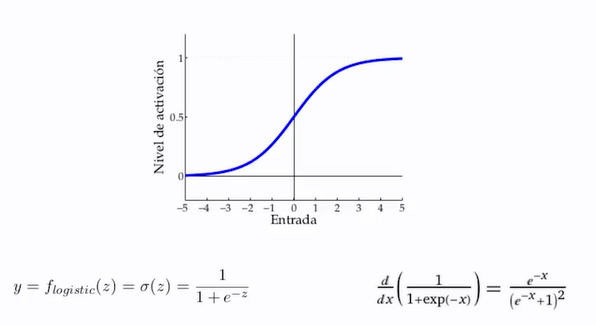
- **Función Tangente Hiperbólica/TanH**: es como la función sigmoidal solo que va desde -1 hasta 1 por lo que puede tomar valores negativos. <br> 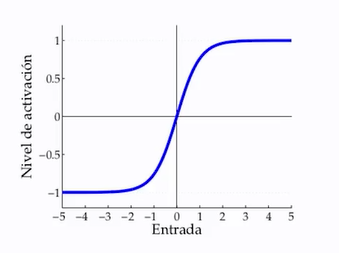 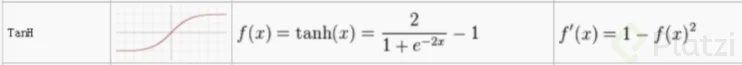
- **Función Lineal Rectificada/ReLu**: si el valor es menor a 0 entonces siempre será 0, de lo contrario, conserva el valor de entrada; es la función más usada al trabajar con capas ocultas ya que enriquece el valor original (siempre que sea mayor a 0) y es deformada por lo que la información es más limpia y pura, además que cuenta con derivada. <br> 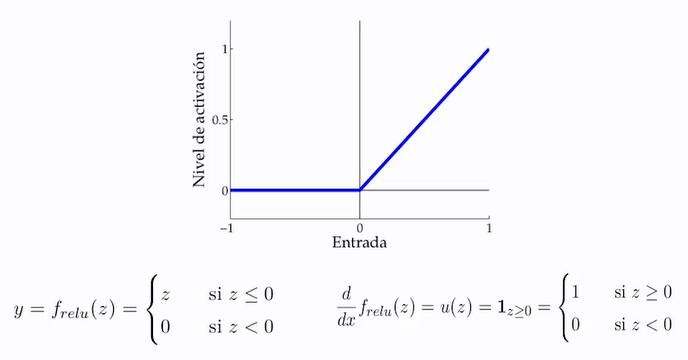
- **Función Softmax**: es una función que retorna la probabilidad de cada posible salida. <br> 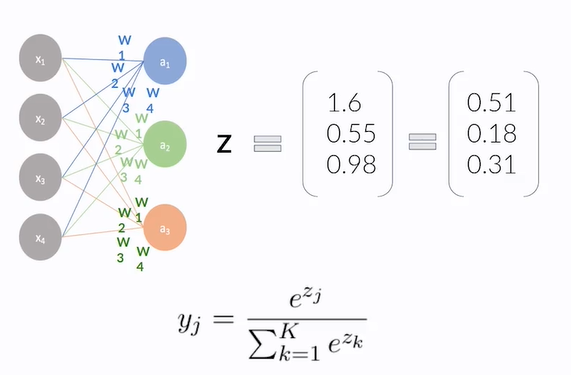

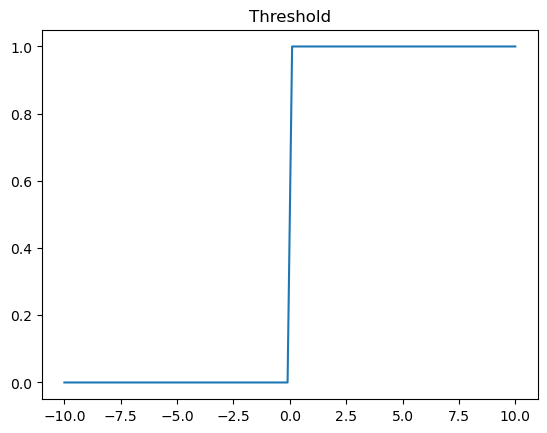

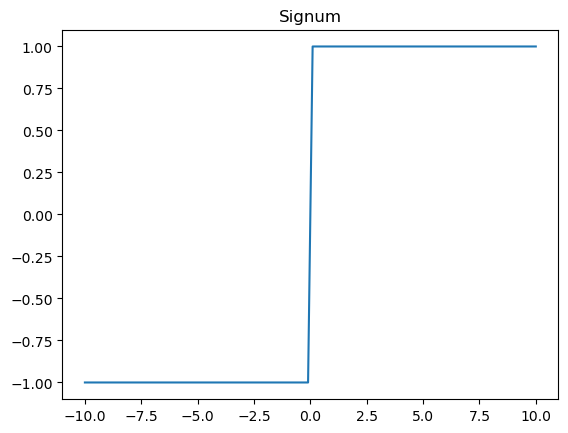

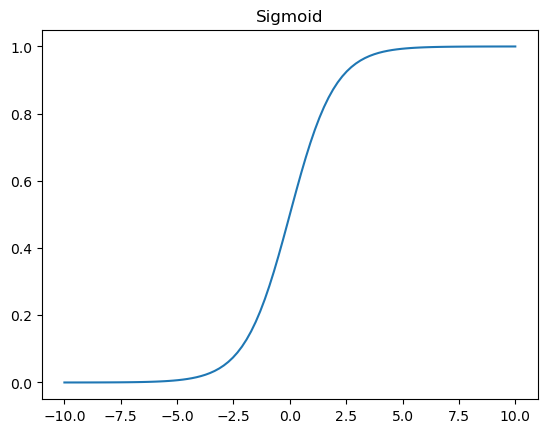

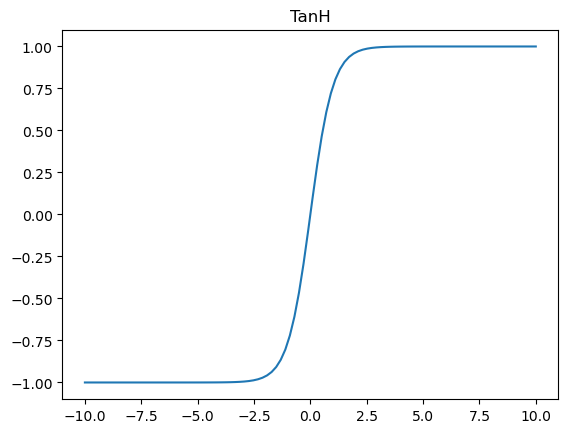

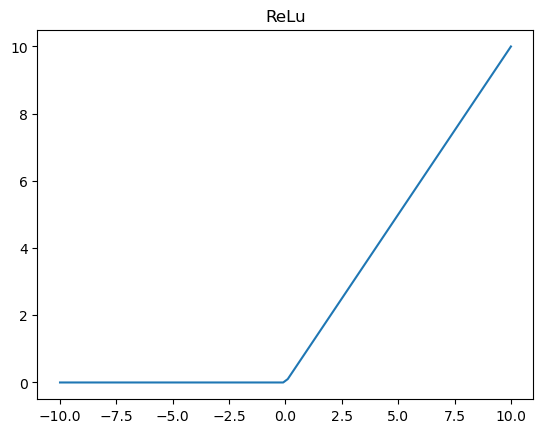

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Threshold
def threshold(a):
    # a < 0 -> 0; a >= 0 -> 1
    return np.piecewise(a, [a < 0, a >= 0], [0, 1])

# Signum
def signum(a):
    # a < 0 -> -1; a >= 0 -> 1
    return np.piecewise(a, [a < 0, a >= 0], [-1, 1])

# Sigmoid
def sigmoid(a, derivate = False):
    if derivate:
        # Retorna la derivada
        return np.exp(-a) / ((np.exp(-a) + 1) **2 )
    else:
        # Retorna la sigmoide
        return 1 / (1 + np.exp(-a))
    
def tanh(a, derivate = False):
    if derivate:
        # Retorna la derivada
        return ((4 * np.exp(-2 * a)) / ((1 + np.exp(-2 * a)) ** 2))
    else:
        # Retorna la tangente hiperbólica
        return np.tanh(a)
    
def relu(a):
    return np.maximum(0, a)

x = np.linspace(-10, 10, 100)
plt.plot(x, threshold(x))
plt.title("Threshold")
plt.show()

plt.plot(x, signum(x))
plt.title("Signum")
plt.show()

plt.plot(x, sigmoid(x))
plt.title("Sigmoid")
plt.show()

plt.plot(x, tanh(x))
plt.title("TanH")
plt.show()

plt.plot(x, relu(x))
plt.title("ReLu")
plt.show()


### Funciones de Pérdida

Las funciones de pérdida comparan los valores reales y los de la predicción*; un valor alto de la función de pérdida implica que las predicciones son malas, mientras que uno bajo indica que las predicciones son buenas. Existen muchas funciones de pérdida pero algunas de las más usadas son:
- **MSE Mean Squared Error**: usado en regresiones, es la sumatoria de las distancias al cuadrado entre el valor real y la predicción; se eleva al cuadrado para castigar los valores más grandes. <br> 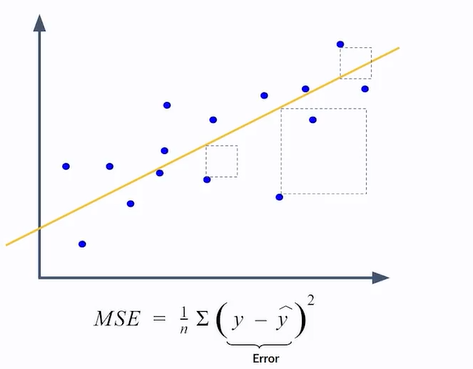
- **Cross Entropy**: es usado para clasificaciones y se basa en medir la distancia entre la predicción real y la predicción del modelo. <br> 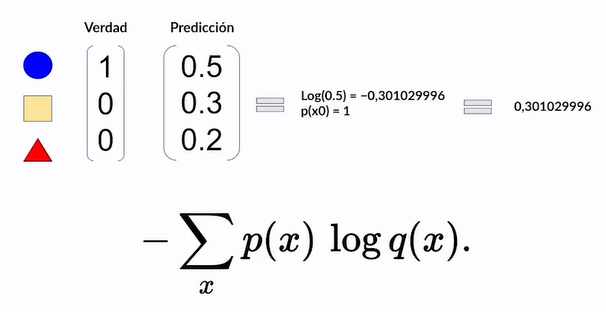

### Descenso del Gradiente

Podemos derivar las funciones (no todas) lo que nos permite conocer los puntos máximos y mínimos con lo cual podemos optimizar las funciones de pérdida justamente buscando el valor mínimo de la función.

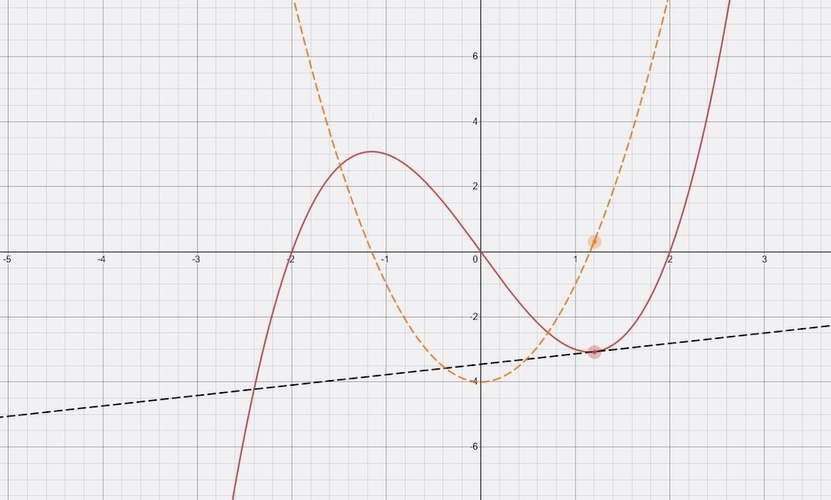
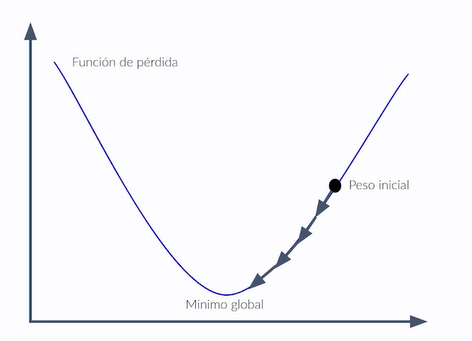

Buscamos el mínimo en la función de pérdida ya que indica que las predicciones son muy buenas.

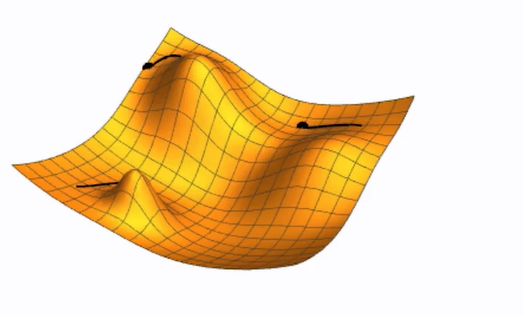
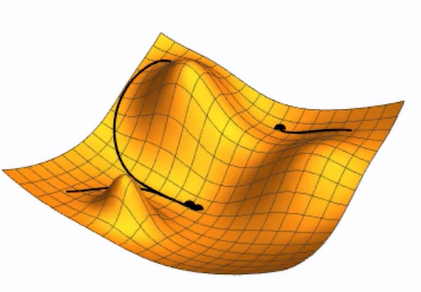

La malla representa la función de pérdida y el objetivo de las bolas es llegar al punto más bajo.

Existe un concepto llamado **learning rate** el cual es la distancia de los pasos que da cada bola para encontrar el punto más bajo; estos pasos pueden ser muy largos o muy cortos

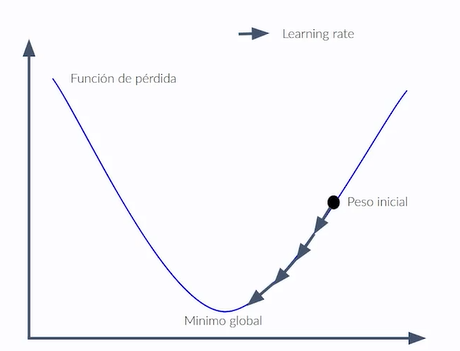
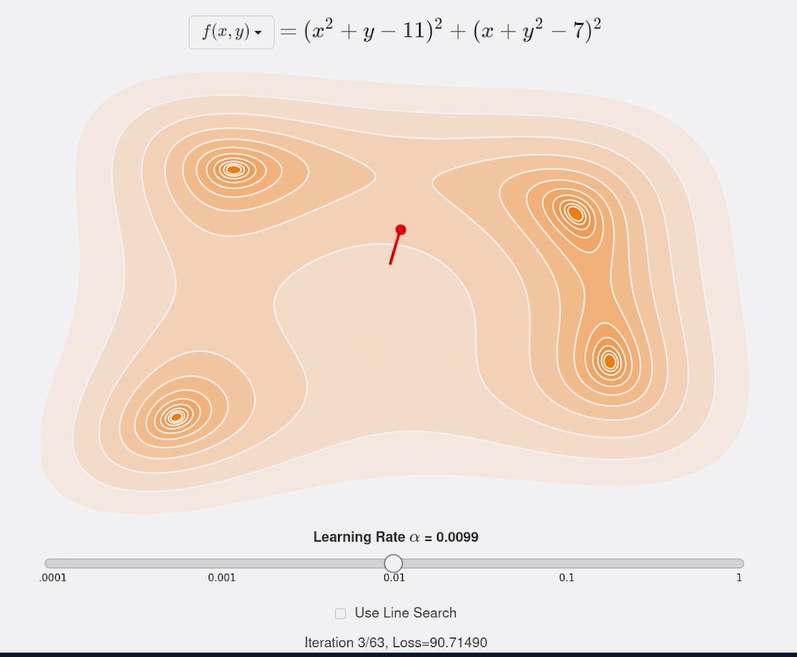
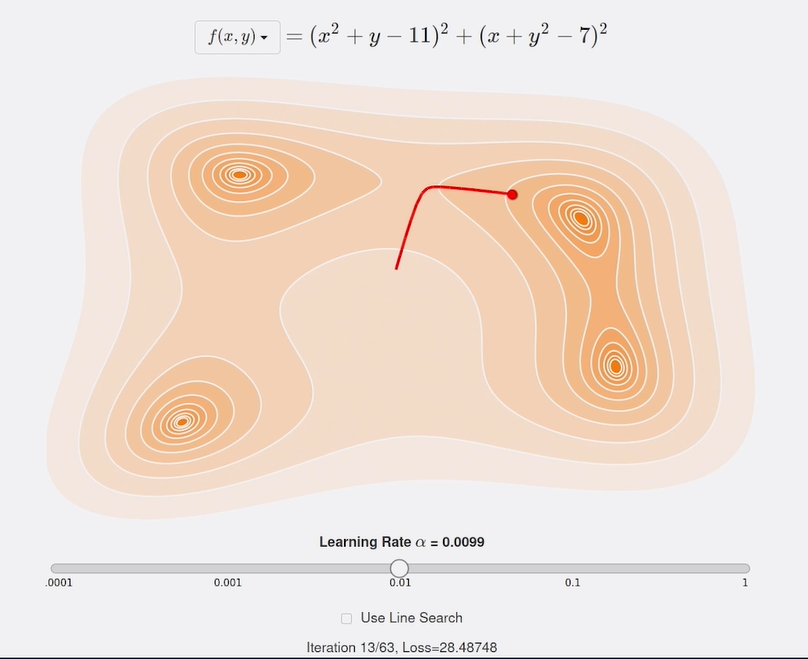
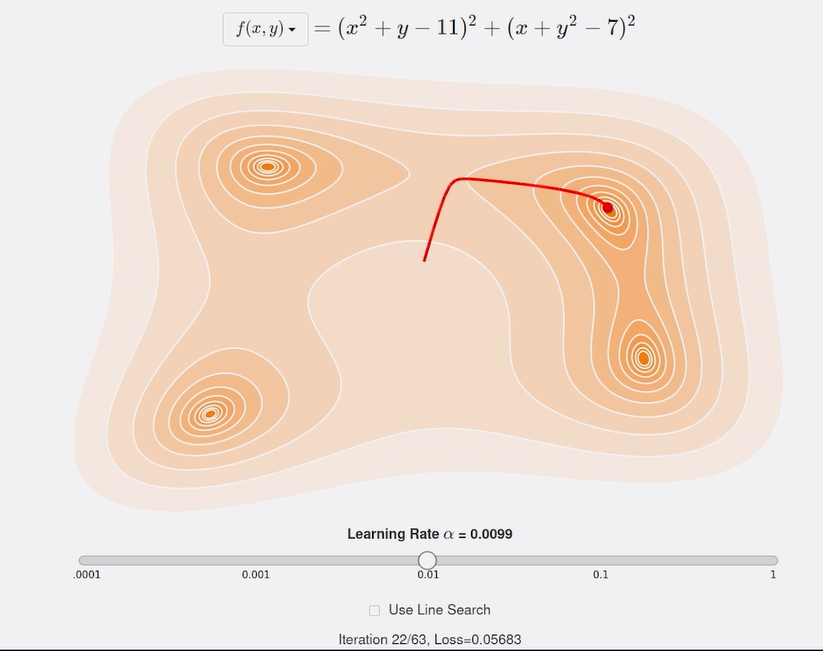

Es necesario ajustar bien el learning rate para que el algoritmo pueda encontrar el valor mínimo.

Es posible que la función de pérdida tenga más de un mínimo y es posible que el algoritmo se estanque en un mínimo local y no en el mínimo global lo que causaría que la función estuviera optimizada pero no por completo; lo que nos salva de esto es el concepto físico de **momentum** que podría verse como que la bola va cruzando el mínimo local y si tiene la suficiente velocidad entonces supera la montaña y llega al mínimo local

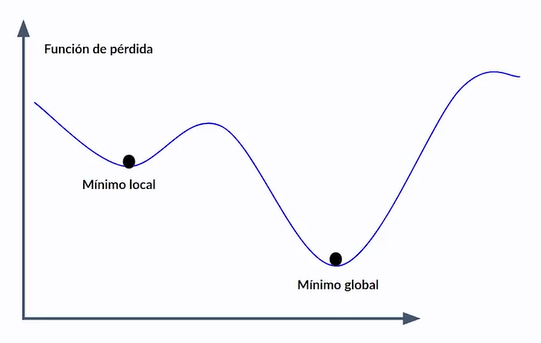
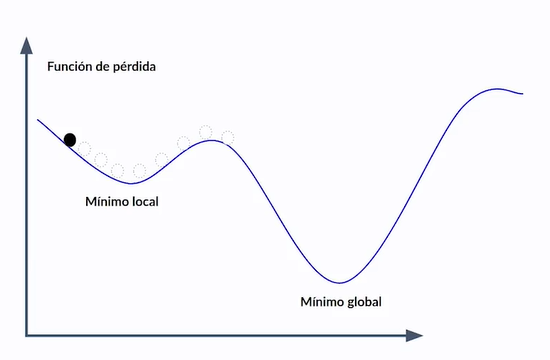

### Backpropagation

**Backpropagation** consiste en cómo voy a distribuir el error obtenido con la función de pérdida en la red neuronal. Tenemos unos pesos los cuales multiplicamos por lo datos de entrada y todo esto lo sumamos para que al final la última capa nos devuelva una predicción y utilizando la función de pérdida sabremos qué tan acertado es el modelo; con esta información utilizamos descenso del gradiente (o cualquier optimizador) para actualizar los pesos en la red para comenzar el ciclo. Es decir, en cada iteración se actualizan los pesos basados en la función de pérdida y el descenso del gradiente siempre buscando el mínimo global de la función de pérdida.

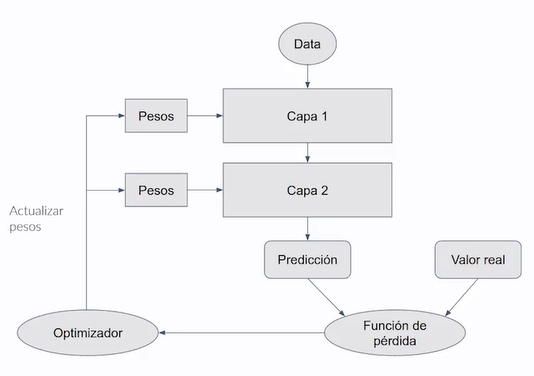

La función de pérdida encuentra un error el cual es asignado a la última capa pero esta capa no es la responsable del error ya que simplemente entregó la predicción con la información entregada por la capa anterior pero la información de dicha capa también fue pasada por la anterior a ella por lo cual nos preguntamos cómo distribuir el error y el algoritmo que resuelve esto es backpropagation.

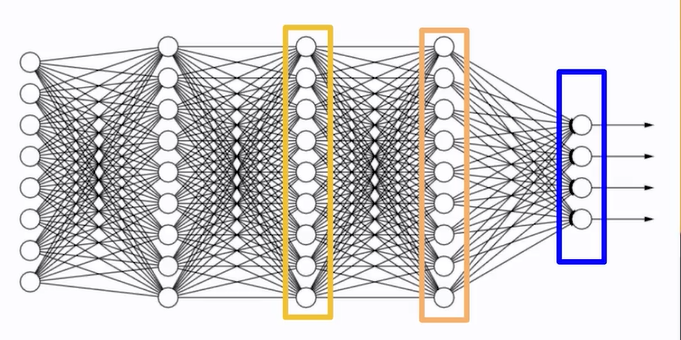

**Backpropagation** funciona evaluando la red con el aprendizaje inverso, es decir, vamos desde la última capa hasta la capa inicial distribuyendo el error de la función de pérdida y el descenso del gradiente con derivadas parciales.

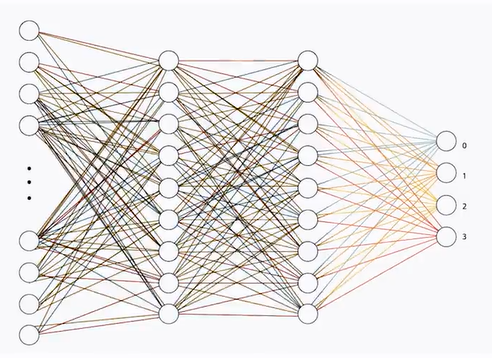
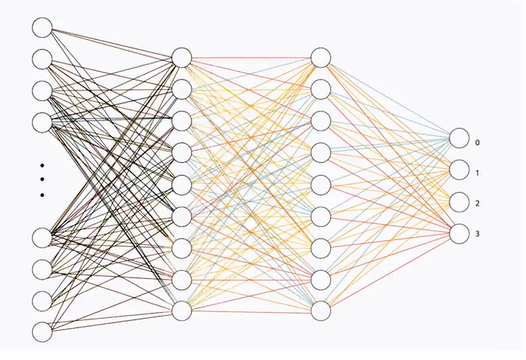
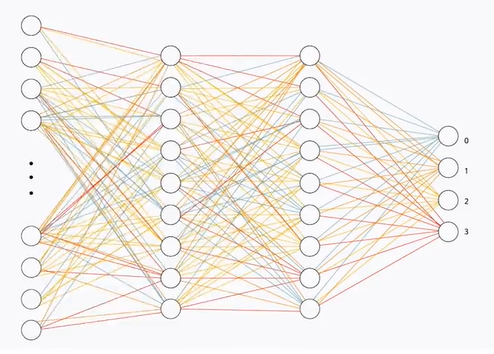
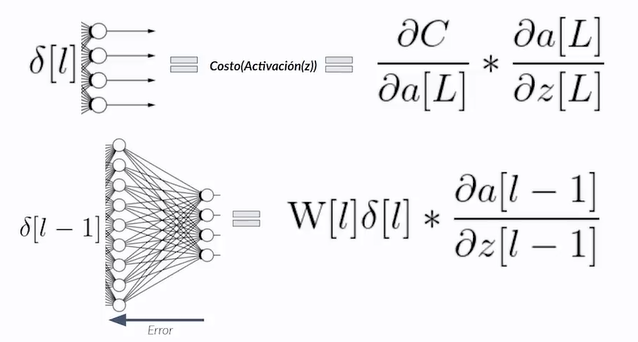
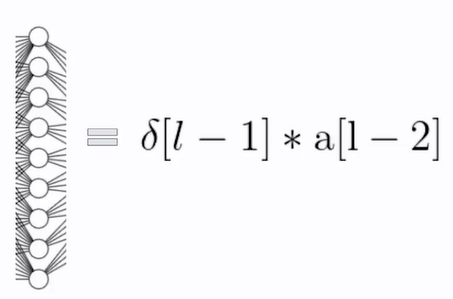

## Redes Neuronales con Python

### Dimensiones de datos

- Escalar: número simple. Tensor de orden 0.
- Vector: es un arreglo ordenado de números. Tensor de orden 1.
- Matriz: es un vector rectangular, dos dimensiones. Tensor de orden 2.
- Tensor: es una identidad matemática que relaciona conjuntos de objetos en diferentes dimensiones.

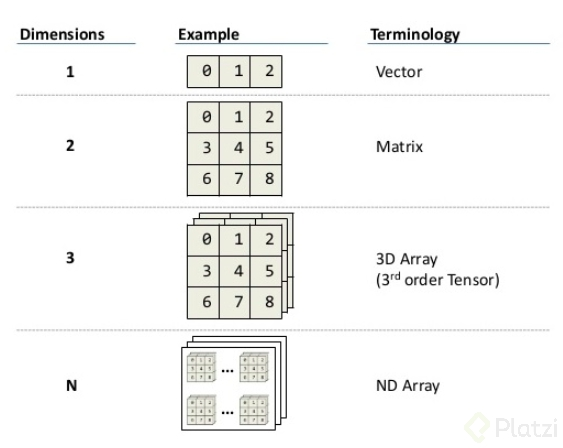
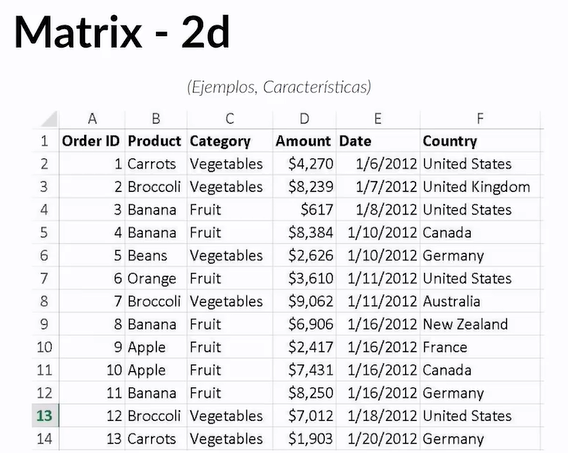
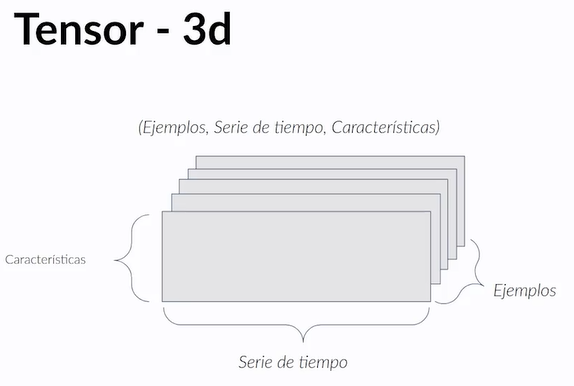
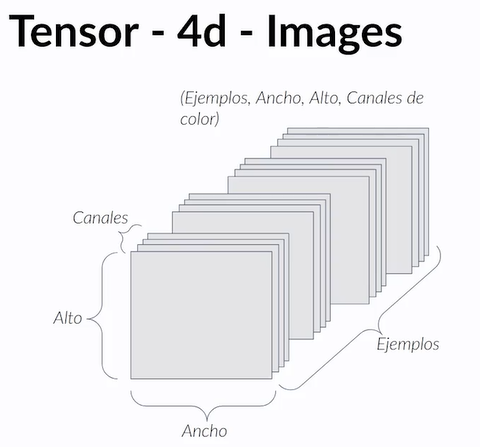

In [2]:
import numpy as np

In [4]:
# Escalar
escalar = np.array(42)
print(escalar.shape)
escalar.ndim

()


0

In [5]:
# Vector
vector = np.array([42, 23, 453, 21, 32, 1, 3, 7])
print(vector.shape)
vector.ndim

(8,)


1

In [6]:
# Matriz
matriz = np.array([
    [42, 23, 453], 
    [34, 343, 24]
])
print(matriz.shape)
matriz.ndim

(2, 3)


2

In [8]:
# Tensor
tensor = np.array([
    [
        [42, 23, 453],
        [34, 343, 24]
    ],
    [
        [42, 23, 453],
        [34, 343, 24]
    ],
    [
        [42, 23, 453],
        [34, 343, 24]
    ],
    [
        [42, 23, 453],
        [34, 343, 24]
    ]
])
print(tensor.shape)
tensor.ndim

(4, 2, 3)


3

La función **reshape** nos permite cambiar la forma de la estructura.

In [9]:
x = np.array([
    [0, 1],
    [2, 3],
    [4, 5],
    [6, 7]
])
x.shape

(4, 2)

In [10]:
# Filas, columnas
x.reshape(8, 1)

array([[0],
       [1],
       [2],
       [3],
       [4],
       [5],
       [6],
       [7]])

In [11]:
# Filas, columnas
x.reshape(2, 4)

array([[0, 1, 2, 3],
       [4, 5, 6, 7]])

El número de filas y columnas debe ser compatible con la cantidad de datos iniciales; en este caso, teníamos 8 datos por lo cual debemos usar combinaciones de filas y columnas que puedan contener esos 8 datos.

In [12]:
# Filas, columnas
x.reshape(2, 3)

ValueError: cannot reshape array of size 8 into shape (2,3)

### Creando una red neuronal

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_gaussian_quantiles

Vamos a crear todo desde cero, incluyendo el set de datos

In [2]:
# 1000 ejemplos
N = 1000
# Creamos círculos gaussianos, 1000 ejemplos con 2 features y 2 clases
gaussianQuantiles = make_gaussian_quantiles(mean = None, cov = 0.1, n_samples = N, n_features = 2, n_classes = 2, shuffle = True, random_state = 42)

Ahora creamos nuestros X y Y

In [3]:
X, y = gaussianQuantiles

Vemos que tenemos 1000 ejemplos con dos características

In [4]:
X.shape

(1000, 2)

In [5]:
y.shape

(1000,)

Tenemos a Y como un vector pero vamos a agregarle un axis

In [6]:
y = y[:, np.newaxis]

Ahora grafiquemos

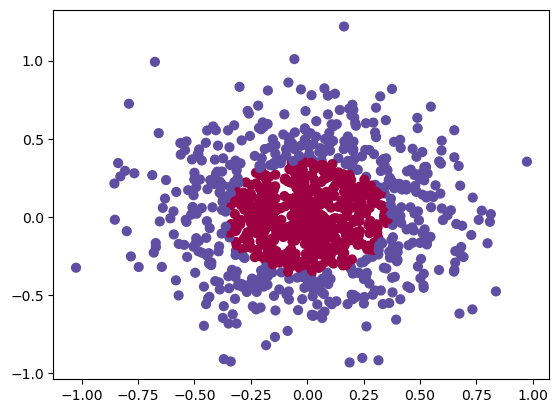

In [7]:
# Todos los valores del primer eje; todos los valores del segundo eje; clasificación respecto a Y; tamaño de 40
plt.scatter(X[:, 0], X[:, 1], c = y[:, 0], s = 40, cmap = plt.cm.Spectral)
plt.show()

Lo que buscamos con este problema es que la red neuronal pueda distinguir que en el centro se ubica un clúster y hacia los bordes otro.

Ahora creamos la función de activación y la función de pérdida. Utilizaremos como funciones de activación la Sigmoide y ReLu y para la función de pérdida utilizaremos el MSE

In [8]:
# Sigmoid
def sigmoid(a, derivate = False):
    if derivate:
        # Retorna la derivada
        return np.exp(-a) / ((np.exp(-a) + 1) **2 )
    else:
        # Retorna la sigmoide
        return 1 / (1 + np.exp(-a))

# ReLu
def relu(a, derivate = False):
    if derivate:
        # Regresa la derivada
        a[a <= 0] = 0
        a[a > 0] = 1
        return a
    else:
        # Retorna ReLu
        return np.maximum(0, a)

# MSE
def mse(y, yHat, derivate = False):
    if derivate:
        # Regresa la derivada
        return 2 * (yHat - y)
    else:            
        # Retorna el MSE
        return np.mean((yHat - y) ** 2)

Lo siguiente es crear la estructura de la red neuronal creando los pesos y el sesgo. Lo primero es crear una especie de lista dónde guardaremos la estructura de la red, es decir, las capas de entrada, ocultas y salida.

In [9]:
# Función para inicializar los parámetros que recibe las dimensiones de las capas ocultas
def initializeParametersDeep(layerDims):
    # Creamos un diccionario donde almacenar los parámetros
    parameters = {}
    # Longitud del arreglo de las dimensiones de las capas ocultas
    lenght = len(layerDims)
    # Creamos los pesos de forma aleatoria
    for l in range(lenght - 1):
        # El peso W_1, W_2, ...
        # Generamos un arreglo de números de tamaño del arreglo de dimensiones en la dimensión l por la dimensión l + 1; 
        # multiplicamos por 2 y restamos 1 para que los valores estén entre -1 y 1
        parameters["W" + str(l + 1)] = (np.random.rand(layerDims[l], layerDims[l + 1]) * 2) - 1
        
        # Generamos el bias el cual tiene siempre dimensión de 1
        parameters["b" + str(l + 1)] = (np.random.rand(1, layerDims[l + 1]) * 2) - 1
    # Retorna los parámetros con valores aleatorios
    return parameters

Ahora probamos que funciona

In [10]:
# 2 features de entrada, 4 neuronas, 8 neuronas, 1 neurona de salida
layersDim = [2, 4, 8, 1]
params = initializeParametersDeep(layersDim)
params

{'W1': array([[ 0.07467719,  0.64115587,  0.47575146, -0.96139824],
        [-0.44006404, -0.13188367,  0.78862026,  0.44477064]]),
 'b1': array([[-0.75503318,  0.81371772, -0.31620716,  0.31548272]]),
 'W2': array([[ 0.90154956, -0.58463462,  0.66184497, -0.66790656, -0.55367726,
         -0.40603013,  0.82508674, -0.56750258],
        [-0.62029543,  0.05022009,  0.19365002,  0.25427717,  0.11670512,
         -0.53253156,  0.02280694,  0.89610489],
        [-0.1226223 ,  0.20906688,  0.58949622,  0.74994272, -0.00341217,
          0.22848748,  0.07095211, -0.03980788],
        [ 0.51849192, -0.19852131, -0.81608704, -0.01287627,  0.20931364,
         -0.47470293, -0.4823294 , -0.77926235]]),
 'b2': array([[-0.48461712, -0.36074541,  0.25589469, -0.48032801, -0.26470011,
          0.33758376,  0.85243725,  0.5290035 ]]),
 'W3': array([[-0.14379806],
        [ 0.91033357],
        [-0.59805652],
        [ 0.24374198],
        [-0.28934808],
        [ 0.85117118],
        [-0.58194513],


Vemos que en la capa 1 vienen 4 pesos por 2 valores; en la capa 2 vienen 8 pesos por 4 valores.

A la final nuestra red neuronal se vería algo así:

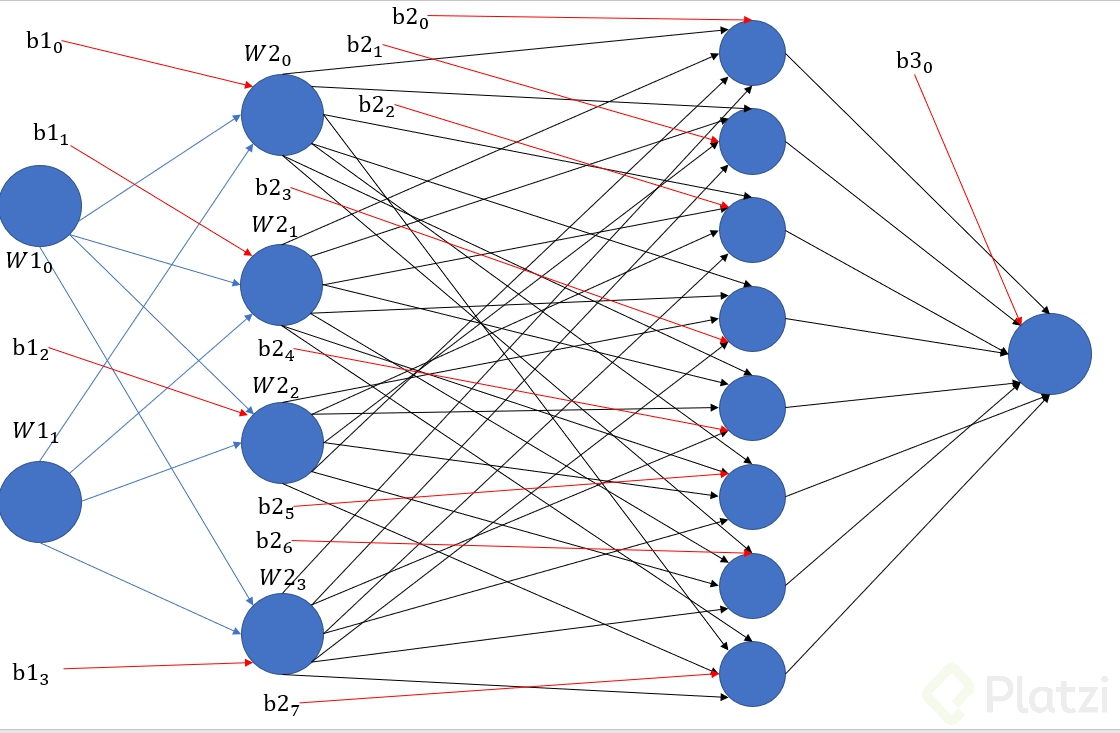

Procedemos a crear nuestra función de entrenamiento
![](Artificial-Neuron-Working.gif)

In [11]:
# Valores de entrada
params["A0"] = X

# Multiplicación matricial de los valores de entrada con los pesos W1 y le sumamos el bias
params["Z1"] = np.matmul(params["A0"], params["W1"]) + params["b1"]
# Ahora debemos aplicar una función de activación porque no podemos apilar lineas ya que perderíamos el Deep Learning
# en este caso, aplicamos la función ReLu ya que converge rápido y tiene derivada
params["A1"] = relu(params["Z1"])

# Repetimos exactamente el mismo proceso para las otras capas
params["Z2"] = np.matmul(params["A1"], params["W2"]) + params["b2"]
params["A2"] = relu(params["Z2"])

params["Z3"] = np.matmul(params["A2"], params["W3"]) + params["b3"]
# Esta es la última capa la cual se encarga de hacer la predicción; como solo tenemos dos clases y queremos saber la probabilidad
# de cada clase entonces usamos la función Sigmoide
params["A3"] = sigmoid(params["Z3"])

# Por último, tenemos el output que no es más que el resultado de la activación de la última capa
output = params["A3"]

Ya tenemos el entrenamiento forward de nuestra red neuronal, ahora aplicaremos backpropagation.

Recordemos que backpropagation consiste en tomar la última capa, la predicción, pasarla por la fución de pérdida y comenzar a propagar el error hacia atrás.

![](backpropagation.gif)

In [12]:
# Lo primero es comenzar a calculas los deltas (derivadas parciales) de la última capa
"""
La derivada parcial de la última capa es directamente la derivada de la función de pérdida por la activación
Llamamos la función de pérdida y le enviamos los valores reales, las predicciones y especificamos que queremos la derivada
Multiplicamos por la función de activación y le enviamos la última capa y especificamos que queremos la derivada
"""
params["dZ3"] = mse(y, output, True) * sigmoid(params["A3"], True)
"""
Ahora debemos obtener la derivada parcial de los pesos de la última capa
Multiplicamos lo que obtuve de la función de activación de la capa anterior por la delta de Z3 (Regla de la Cadena)
Tenemos un problema y es que la forma de A2 es (1000, 8) y de dZ3 es (1000, 1) por lo cual no son compatibles para la 
multiplicación, por ello, utilizamos la transpuesta de A2
"""
params["dW3"] = np.matmul(params["A2"].T, params["dZ3"])

# Ahora calculamos los deltas de las dos capas hacia atrás
"""
Como no estamos en la última capa, el delta de Z se calcula de forma diferente; multiplicamos el delta de la capa superior
por los pesos en la capa superior pero a estos pesos le aplicamos la transpuesta para poder coincidir las dimensiones; 
ese resultado lo multiplicamos por la derivada de la función de activación de la capa en la que estamos
"""
params["dZ2"] = np.matmul(params["dZ3"], params["W3"].T) * relu(params["A2"], True)
params["dW2"] = np.matmul(params["A1"].T, params["dZ2"])

params["dZ1"] = np.matmul(params["dZ2"], params["W2"].T) * relu(params["A1"], True)
params["dW1"] = np.matmul(params["A0"].T, params["dZ1"])

Por último, nos queda hacer el descenso del gradiente para actualizar los pesos de la red neuronal.

![](gradient.gif)

In [13]:
# Los pesos W3 van a ser iguales a sus valores menos la delta de esos mismos pesos; todo esto multiplicado por el Learning Rate
params["W3"] = params["W3"] - params["dW3"] * 0.0001
# Ahora actualizamos el bias
"""
El bias será el mismo bias menos la derivada de la última capa pero como esta última tiene un tamaño de 1000 entonces utilizamos
la media y todo ello lo multiplicamos por el Learning Rate
"""
params["b3"] = params["b3"] - (np.mean(params["dZ3"], axis = 0, keepdims = True)) * 0.0001

# Continuamos con los otros pesos y bias
params["W2"] = params["W2"] - params["dW2"] * 0.0001
params["b2"] = params["b2"] - (np.mean(params["dZ2"], axis = 0, keepdims = True)) * 0.0001

params["W1"] = params["W1"] - params["dW1"] * 0.0001
params["b1"] = params["b1"] - (np.mean(params["dZ1"], axis = 0, keepdims = True)) * 0.0001

Ya tenemos el entrenamiento forward para sacar la predicción, backpropagation para propagar el error y descenso del gradiente para actualizar los pesos y bias. Vamos a juntar todo en una única función.

In [14]:
# Función para entrenar la red neuronal que recibe los datos, el Learning Rate, los parámetros y 
# si se desea hacer solo predicciones y no el entrenamiento

def train(XData, lr, params, training = True):
    # Forward
    params["A0"] = XData

    # Multiplicación matricial de los valores de entrada con los pesos W1 y le sumamos el bias
    params["Z1"] = np.matmul(params["A0"], params["W1"]) + params["b1"]
    # Ahora debemos aplicar una función de activación porque no podemos apilar lineas ya que perderíamos el Deep Learning
    # en este caso, aplicamos la función ReLu ya que converge rápido y tiene derivada
    params["A1"] = relu(params["Z1"])

    # Repetimos exactamente el mismo proceso para las otras capas
    params["Z2"] = np.matmul(params["A1"], params["W2"]) + params["b2"]
    params["A2"] = relu(params["Z2"])

    params["Z3"] = np.matmul(params["A2"], params["W3"]) + params["b3"]
    # Esta es la última capa la cual se encarga de hacer la predicción; como solo tenemos dos clases y queremos saber la probabilidad
    # de cada clase entonces usamos la función Sigmoide
    params["A3"] = sigmoid(params["Z3"])

    # Por último, tenemos el output que no es más que el resultado de la activación de la última capa
    output = params["A3"]
    
    if training:
        # Backpropagation
        # Lo primero es comenzar a calculas los deltas (derivadas parciales) de la última capa
        """
        La derivada parcial de la última capa es directamente la derivada de la función de pérdida por la activación
        Llamamos la función de pérdida y le enviamos los valores reales, las predicciones y especificamos que queremos la derivada
        Multiplicamos por la función de activación y le enviamos la última capa y especificamos que queremos la derivada
        """
        params["dZ3"] = mse(y, output, True) * sigmoid(params["A3"], True)
        """
        Ahora debemos obtener la derivada parcial de los pesos de la última capa
        Multiplicamos lo que obtuve de la función de activación de la capa anterior por la delta de Z3 (Regla de la Cadena)
        Tenemos un problema y es que la forma de A2 es (1000, 8) y de dZ3 es (1000, 1) por lo cual no son compatibles para la 
        multiplicación, por ello, utilizamos la transpuesta de A2
        """
        params["dW3"] = np.matmul(params["A2"].T, params["dZ3"])

        # Ahora calculamos los deltas de las dos capas hacia atrás
        """
        Como no estamos en la última capa, el delta de Z se calcula de forma diferente; multiplicamos el delta de la capa superior
        por los pesos en la capa superior pero a estos pesos le aplicamos la transpuesta para poder coincidir las dimensiones; 
        ese resultado lo multiplicamos por la derivada de la función de activación de la capa en la que estamos
        """
        params["dZ2"] = np.matmul(params["dZ3"], params["W3"].T) * relu(params["A2"], True)
        params["dW2"] = np.matmul(params["A1"].T, params["dZ2"])

        params["dZ1"] = np.matmul(params["dZ2"], params["W2"].T) * relu(params["A1"], True)
        params["dW1"] = np.matmul(params["A0"].T, params["dZ1"])
        
        # Gradient descent
        # Los pesos W3 van a ser iguales a sus valores menos la delta de esos mismos pesos; todo esto multiplicado por el Learning Rate
        params["W3"] = params["W3"] - params["dW3"] * lr
        # Ahora actualizamos el bias
        """
        El bias será el mismo bias menos la derivada de la última capa pero como esta última tiene un tamaño de 1000 entonces utilizamos
        la media y todo ello lo multiplicamos por el Learning Rate
        """
        params["b3"] = params["b3"] - (np.mean(params["dZ3"], axis = 0, keepdims = True)) * lr

        # Continuamos con los otros pesos y bias
        params["W2"] = params["W2"] - params["dW2"] * lr
        params["b2"] = params["b2"] - (np.mean(params["dZ2"], axis = 0, keepdims = True)) * lr

        params["W1"] = params["W1"] - params["dW1"] * lr
        params["b1"] = params["b1"] - (np.mean(params["dZ1"], axis = 0, keepdims = True)) * lr
        
    return output

Lo que sigue es entrenar nuestra red neuronal.

Epoch es cuántas iteraciones realiza la red para llegar a una conclusión; es posible que no tenga suficientes épocas para llegar a una conclusión óptima como también es posible que tenga demasiadas y luego de llegar a una conclusión óptima solo aumenta el error en las siguientes iteraciones.

El Learning Rate es qué tan amplios son los pasos que da el descendo del gradiente tras cada iteración; si es muy pequeño es posible que tarde demasiado en alcanzar el punto mínimo de la función, pero si es muy grande es posible que pase sobre el punto óptimo y no logre llegar a un punto cercano.

In [15]:
# Arquitectura de nuestra red: 2 entradas; 4 neuronas; 8 neuronas; 1 salida
layersDim = [2, 4, 8, 1]
# Inicializamos los pesos y bias
params = initializeParametersDeep(layersDim)
# Lista para almacenar los errores
errors = []

# Realizamos un entrenamiento por épocas; 50000 iteraciones
for _ in range(50000):
    # La salida de la red será el resultado del entrenamiento con los datos X; Learning Rate de 0.001 y entrenamiento completo
    output = train(X, 0.001, params)
    # Cada 25 iteraciones
    if _ % 25 == 0:
        # Guardar el error
        errors.append(mse(y, output))

Ahora vamos a visualizar los errores.

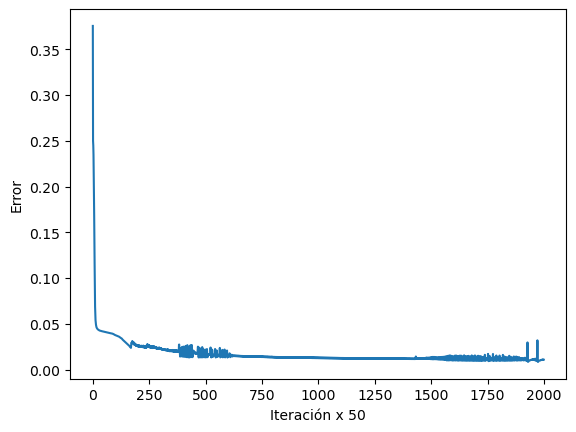

In [18]:
plt.plot(errors)
plt.xlabel("Iteración x 50")
plt.ylabel("Error")
plt.show()

Vamos a probar nuestra red neuronal sobre nuevos datos.

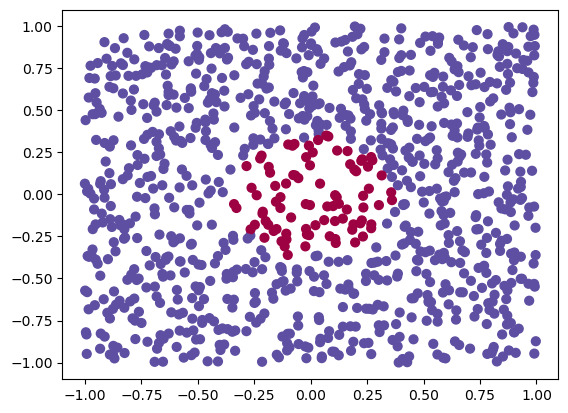

In [19]:
# Creamos 1000 ejemplos aleatorios con 2 dimensiones; multiplicamos por 2 y restamos 1 para que vayan de -1 a 1
dataTest = (np.random.rand(1000, 2) * 2) - 1
# Hacemos solamente predicciones
y = train(dataTest, 0.001, params, training = False)

# Si y >= 0.5 entonces será 1, de lo contrario 0
y = np.where(y >= 0.5, 1, 0)

# Graficamos todos los valores del primer eje; todos los valores del segundo eje; clasificación respecto a Y; tamaño de 40
plt.scatter(dataTest[:, 0], dataTest[:, 1], c = y[:, 0], s = 40, cmap = plt.cm.Spectral)
plt.show()

Nuestra red neuronal aprendió a clasificar los puntos de forma correcta.

## Manejo de Redes Neuronales con Keras

### Manejo de los datos

Una buena práctica es dividir los datos en entrenamiento, validación y prueba.

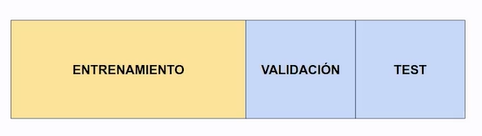

Utilizamos el conjunto de entrenamiento para precisamente entrenar el modelo; luego, usamos el set de validación para probar qué tan buenas fueron las predicciones ya que esto nos da la oportunidad de cambiar los hiperparámetros para que el algoritmo sea más robusto; finalmente, utilizamos el conjunto de testing para evaluar al final cómo fue el comportamiento del modelo. 
Necesitamos probar el modelo con datos que este JAMÁS haya visto.

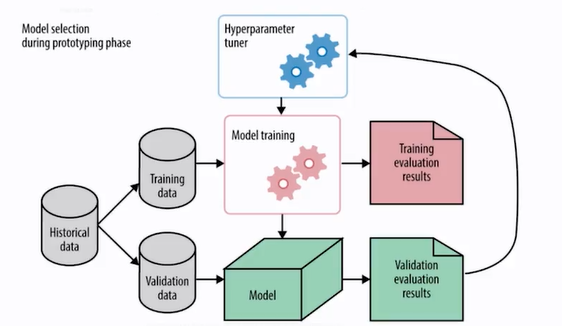